In [1]:
#Practical No:03
#Use MNIST Fashion Dataset and create a classifier to classify fashion c
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np

C:\Users\RAHUL\AppData\Roaming\Python\Python310\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


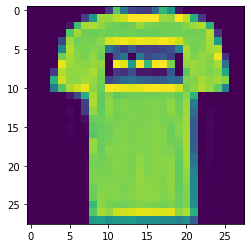

In [3]:
# There are 10 image classes in this dataset and each class has a mappin
#0 T-shirt/top
#1 Trouser
#2 pullover
#3 Dress
#4 Coat
#5 sandals
#6 shirt
#7 sneaker
#8 bag
#9 ankle boot
plt.imshow(x_train[1])

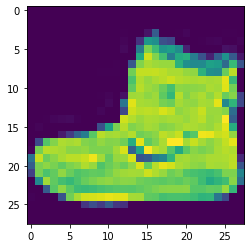

In [4]:
plt.imshow(x_train[0])


In [5]:
# Next, we will preprocess the data by scaling the pixel values to be be
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
# 28, 28 comes from width, height, 1 comes from the number of channels
# -1 means that the length in that dimension is inferred.
# This is done based on the constraint that the number of elements in an
# each image is a row vector (784 elements) and there are lots of such r
#elements). So TensorFlow can infer that -1 is n.
# converting the training_images array to 4 dimensional array with sizes
#dimension.
x_train.shape
(60000, 28, 28)
x_test.shape
(10000, 28, 28, 1)
y_train.shape
(60000,)
y_test.shape
(10000,)

(10000,)

In [6]:
import tensorflow.keras as keras

model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [7]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/10
1875/1875 [==============================] - 70s 35ms/step - loss: 0.5715 - accuracy: 0.7865 - val_loss: 0.3840 - val_accuracy: 0.8551
Epoch 2/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.3739 - accuracy: 0.8639 - val_loss: 0.3257 - val_accuracy: 0.8785
Epoch 3/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.3226 - accuracy: 0.8796 - val_loss: 0.2884 - val_accuracy: 0.8954
Epoch 4/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2967 - accuracy: 0.8900 - val_loss: 0.2772 - val_accuracy: 0.8991
Epoch 5/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2776 - accuracy: 0.8969 - val_loss: 0.2671 - val_accuracy: 0.9041
Epoch 6/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2648 - accuracy: 0.9014 - val_loss: 0.2632 - val_accuracy: 0.9042
Epoch 7/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2517 - accuracy: 0.9071 - val_loss: 0.2572 -